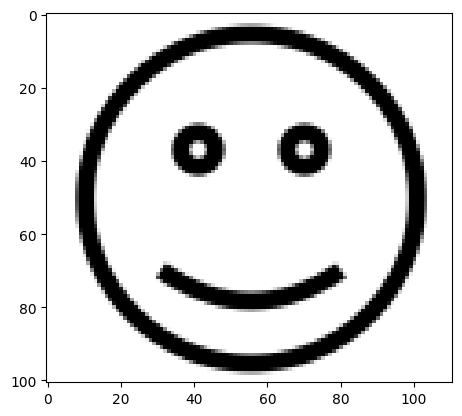

In [26]:
import numpy as np
import torch
import cv2
import matplotlib.pyplot as plt 

SMILE_PATH = "./smile.png"

img_smile = cv2.imread(SMILE_PATH)

plt.imshow(img_smile)

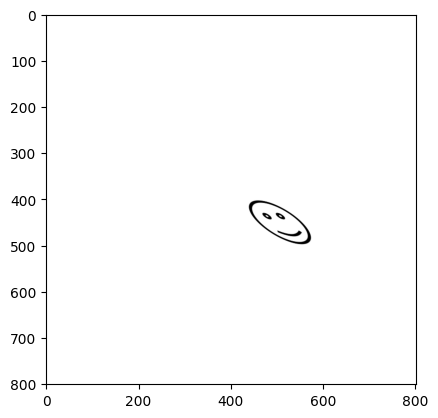

In [31]:
def warp_image(img, H):
    x, y = np.meshgrid(
        np.linspace(
            -400,
            400,
            801
        ),
        np.linspace(
            -400,
            400,
            801
        )
    )
    coords = np.stack([
        x.reshape(-1),
        y.reshape(-1),
        np.ones(x.reshape(-1).shape)
    ])

    coords_transformed = np.matmul(
        np.linalg.inv(H),
        coords
    )
    coords_transformed /= coords_transformed[-1]

    def sampleFromImage(coord) :
        # coord : [x, y]
        if 0 <= coord[0] < img.shape[1] and 0 <= coord[1] < img.shape[0] :
            return img[coord[1], coord[0], :]
        else :
            return np.array([255] * 3)

    return np.array(
        list(map(
            sampleFromImage,
            coords_transformed[:2].T.astype(np.uint32)
        ))
    ).reshape(801, 801, 3)

H = np.array([
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1]
])

plt.imshow(
    warp_image(img_smile, H)
)